<a href="https://colab.research.google.com/github/BilawalBaloch/Data-Science-ML/blob/main/all_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting ML Regression Models Example...
Dataset created: X shape (1000, 20), y shape (1000,)
Target variable shape: (1000,)
Target variable statistics (mean, std): 1.26, 195.30
Training data shape: X_train (700, 20), y_train (700,)
Testing data shape: X_test (300, 20), y_test (300,)
Features scaled using StandardScaler.

--- Training Linear Regression ---
Mean Absolute Error (MAE): 8.2985
Mean Squared Error (MSE): 107.0498
Root Mean Squared Error (RMSE): 10.3465
R-squared (R2): 0.9972


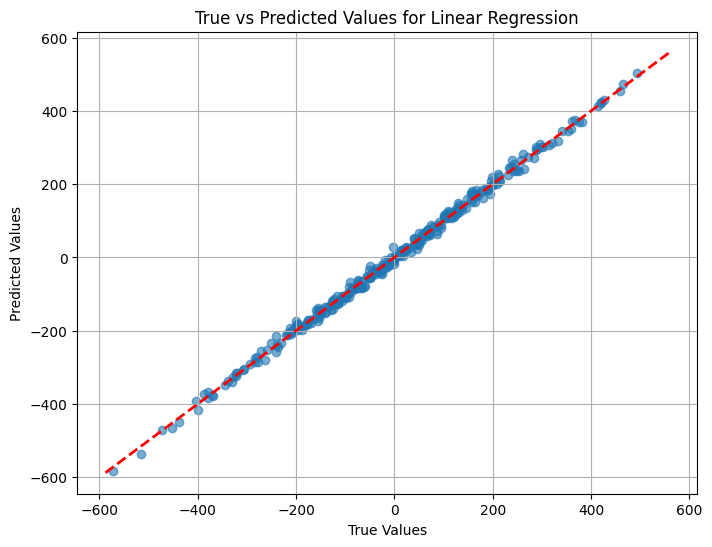


--- Training Decision Tree Regressor ---
Mean Absolute Error (MAE): 119.6877
Mean Squared Error (MSE): 22673.6564
Root Mean Squared Error (RMSE): 150.5777
R-squared (R2): 0.4058


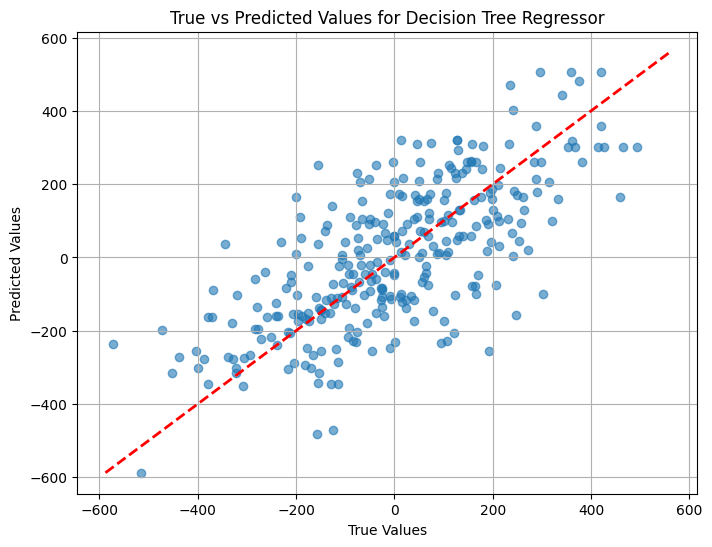


--- Training Random Forest Regressor ---
Mean Absolute Error (MAE): 67.9446
Mean Squared Error (MSE): 7291.2753
Root Mean Squared Error (RMSE): 85.3890
R-squared (R2): 0.8089


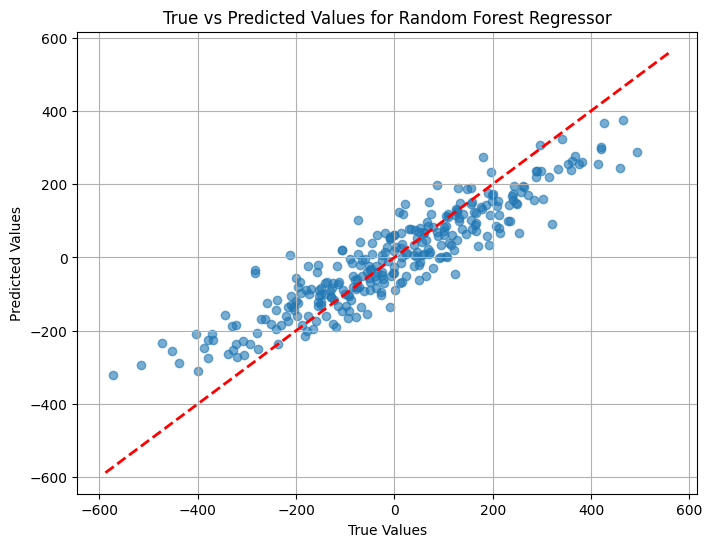


--- Training Support Vector Regressor (SVR) ---
Mean Absolute Error (MAE): 149.5230
Mean Squared Error (MSE): 35112.2795
Root Mean Squared Error (RMSE): 187.3827
R-squared (R2): 0.0798


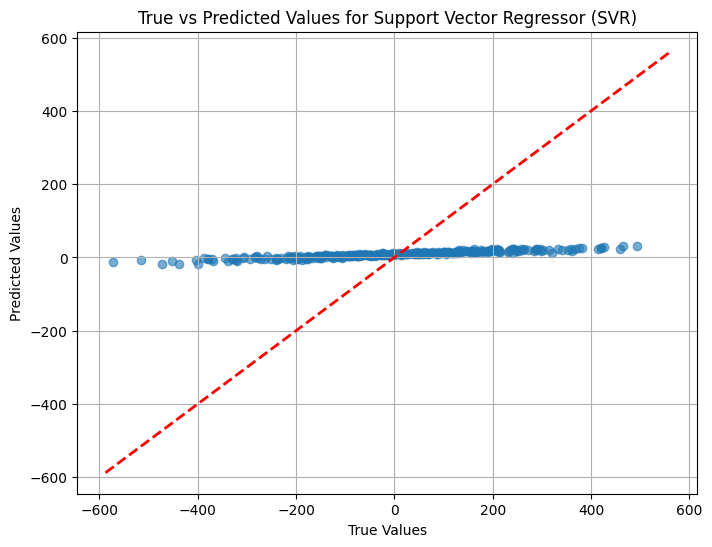


--- Training K-Nearest Neighbors Regressor (KNN) ---
Mean Absolute Error (MAE): 102.6048
Mean Squared Error (MSE): 16135.1441
Root Mean Squared Error (RMSE): 127.0242
R-squared (R2): 0.5771


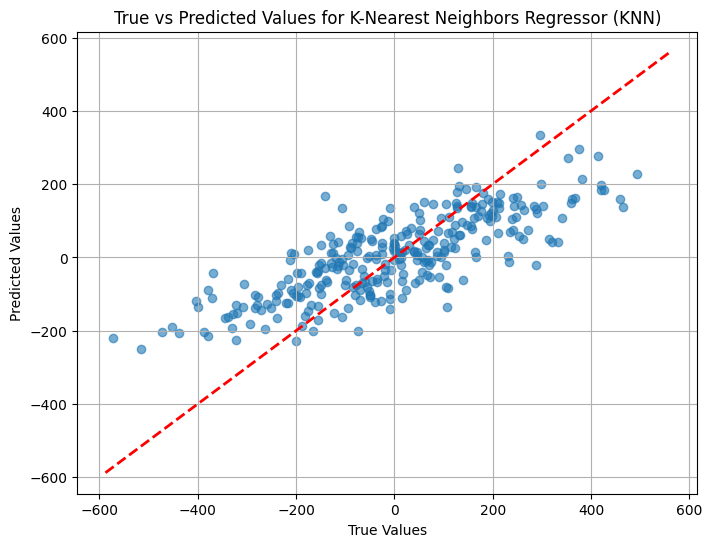


--- Training Gradient Boosting Regressor ---
Mean Absolute Error (MAE): 44.9702
Mean Squared Error (MSE): 3241.8721
Root Mean Squared Error (RMSE): 56.9374
R-squared (R2): 0.9150


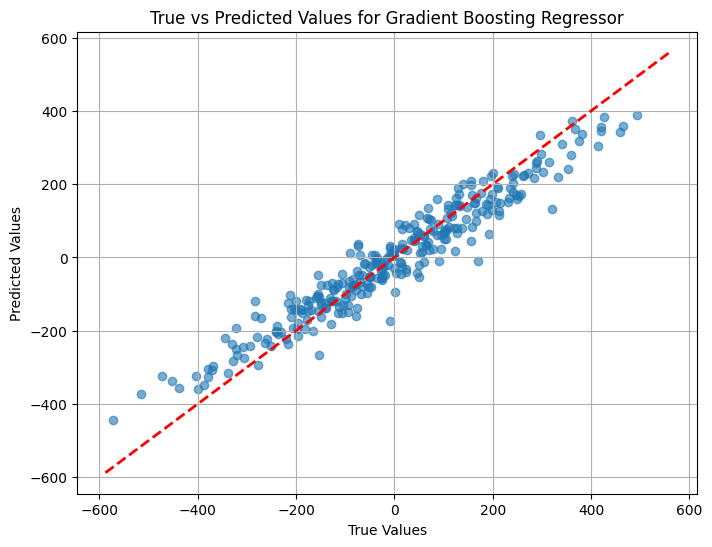


--- Summary of Model Performance ---
Linear Regression:
  MAE: 8.2985
  MSE: 107.0498
  RMSE: 10.3465
  R2: 0.9972
------------------------------
Decision Tree Regressor:
  MAE: 119.6877
  MSE: 22673.6564
  RMSE: 150.5777
  R2: 0.4058
------------------------------
Random Forest Regressor:
  MAE: 67.9446
  MSE: 7291.2753
  RMSE: 85.3890
  R2: 0.8089
------------------------------
Support Vector Regressor (SVR):
  MAE: 149.5230
  MSE: 35112.2795
  RMSE: 187.3827
  R2: 0.0798
------------------------------
K-Nearest Neighbors Regressor (KNN):
  MAE: 102.6048
  MSE: 16135.1441
  RMSE: 127.0242
  R2: 0.5771
------------------------------
Gradient Boosting Regressor:
  MAE: 44.9702
  MSE: 3241.8721
  RMSE: 56.9374
  R2: 0.9150
------------------------------

ML Regression Models Example Finished.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression # Changed from make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Changed from LogisticRegression
from sklearn.tree import DecisionTreeRegressor # Changed from DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Changed from Classifiers
from sklearn.svm import SVR # Changed from SVC
from sklearn.neighbors import KNeighborsRegressor # Changed from KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB # Naive Bayes is for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Changed metrics
import seaborn as sns

print("Starting ML Regression Models Example...")

# --- 1. Data Generation ---
# We'll create a synthetic dataset for a regression problem.
# n_samples: total number of data points
# n_features: total number of features
# n_informative: number of informative features
# n_targets: number of regression targets (output variables)
# bias: a constant added to the target
# noise: standard deviation of the gaussian noise applied to the output
# random_state: for reproducibility
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10,
                       n_targets=1, bias=0.0, noise=10.0, random_state=42)

print(f"Dataset created: X shape {X.shape}, y shape {y.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target variable statistics (mean, std): {np.mean(y):.2f}, {np.std(y):.2f}")


# --- 2. Data Splitting ---
# Split the dataset into training and testing sets.
# test_size: proportion of the dataset to include in the test split
# random_state: for reproducibility
# stratify is not used for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

print(f"Training data shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing data shape: X_test {X_test.shape}, y_test {y_test.shape}")

# --- 3. Feature Scaling ---
# Standardize features by removing the mean and scaling to unit variance.
# This is crucial for models sensitive to feature scales like SVR, Linear Regression, KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler.")

# --- 4. Model Training and Evaluation ---
# We will train and evaluate several regression models.

# Dictionary to store models and their names for easy iteration
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors Regressor (KNN)": KNeighborsRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    # Some models need scaled data, others don't strictly require it but it often helps.
    # We will use scaled data for all for consistency, as it rarely hurts performance.
    if name in ["Linear Regression", "Support Vector Regressor (SVR)", "K-Nearest Neighbors Regressor (KNN)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model using regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Store results
    results[name] = {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }

    # Optional: Plot predicted vs true values for visual inspection
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line for perfect prediction
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values for {name}')
    plt.grid(True)
    plt.show() # Display the plot for each model

print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MAE: {metrics['mae']:.4f}")
    print(f"  MSE: {metrics['mse']:.4f}")
    print(f"  RMSE: {metrics['rmse']:.4f}")
    print(f"  R2: {metrics['r2']:.4f}")
    print("-" * 30)

print("\nML Regression Models Example Finished.")